# LDA

In [1]:
import pandas as pd # For data manipulation and analysis
import numpy as np # For numerical operations

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA # For implementing LDA algorithm
from sklearn.model_selection import train_test_split # For splitting the dataset into training and testing sets
from sklearn.metrics import confusion_matrix, classification_report # For evaluating the model performance
from sklearn.preprocessing import StandardScaler # For feature scaling
from sklearn.datasets import load_iris # To load the iris dataset

/tmp/ipykernel_14376/67557209.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd # For data manipulation and analysis


## Load and Explore the Iris Dataset
Load the Iris dataset from sklearn datasets and explore it using pandas DataFrame.

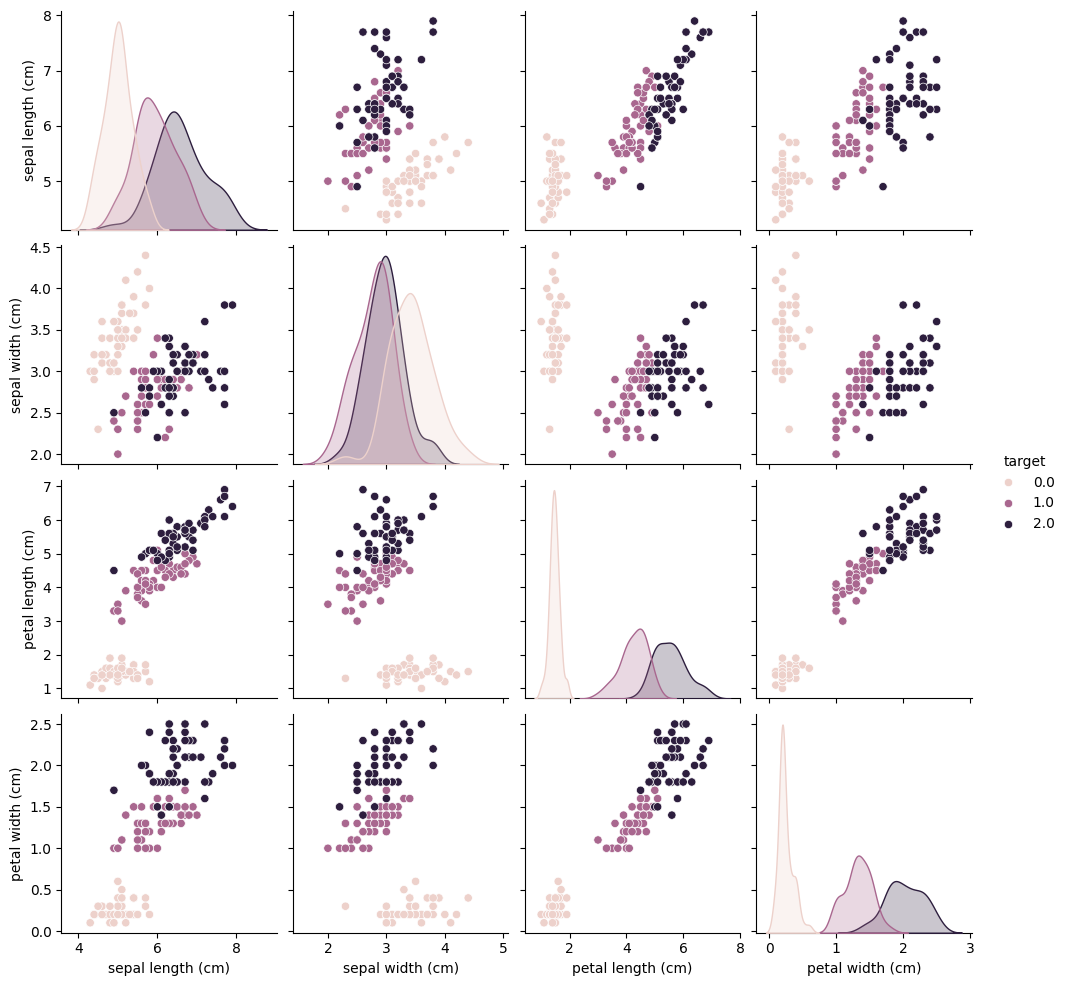

In [2]:
# Load the Iris dataset
iris = load_iris()

# Convert the dataset into pandas dataframe
iris_df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

# Display the first 5 rows of the dataframe
iris_df.head()

# Display the summary statistics of the dataframe
iris_df.describe()

# Check for any missing values in the dataframe
iris_df.isnull().sum()

# Display the distribution of the target variable
iris_df['target'].value_counts()

# Visualize the pairplot of the dataframe
sns.pairplot(iris_df, hue='target')

## Preprocess the Data
Preprocess the data by splitting it into training and testing sets, and scaling the features.

In [3]:
# Define the features and the target variable
X = iris_df.iloc[:, :-1].values
y = iris_df.iloc[:, -1].values

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Scale the features
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Implement LDA for Two Class Classification

Implement LDA for two class classification using sklearn's LinearDiscriminantAnalysis class.

In [4]:
# Create an instance of LDA
lda = LDA(n_components=2)

# Fit the model on the training set
lda.fit(X_train, y_train)

# Predict the classes on the testing set
y_pred = lda.predict(X_test)

# Print the confusion matrix
print(confusion_matrix(y_test, y_pred))

# Print the classification report
print(classification_report(y_test, y_pred))

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        11
         1.0       1.00      1.00      1.00        13
         2.0       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



## Visualize Two Class Classification Results

Visualizing the results of the two class classification using `matplotlib` and `seaborn`.

In [9]:
# Create a dataframe for the test set
test_df = pd.DataFrame(X_test, columns=iris['feature_names'])

# Add the true and predicted classes to the dataframe
test_df['True Class'] = y_test
test_df['Predicted Class'] = y_pred

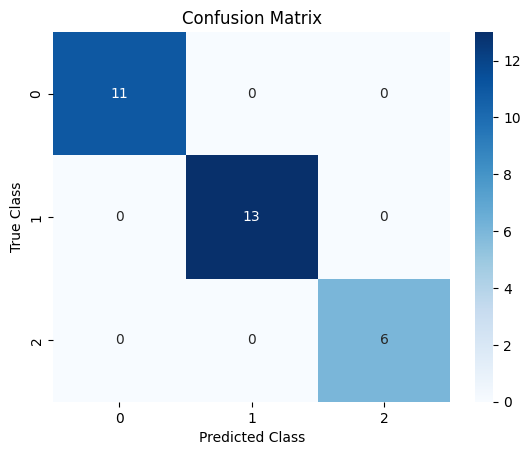

In [10]:
# Plot the confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()

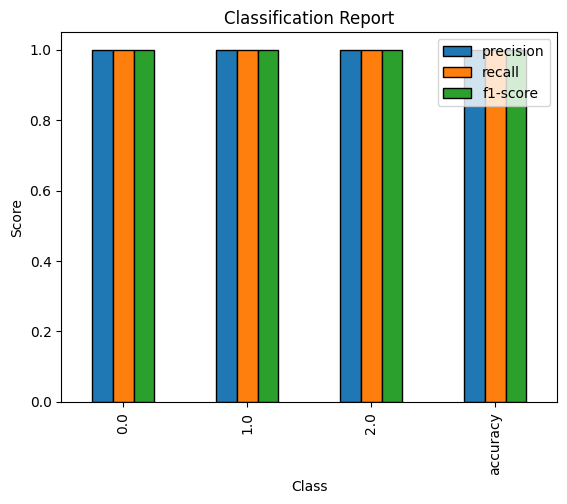

In [7]:
# Plot the classification report
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()
report_df.drop(['macro avg', 'weighted avg'], inplace=True)
report_df[['precision', 'recall', 'f1-score']].plot(kind='bar', edgecolor='black')
plt.title('Classification Report')
plt.xlabel('Class')
plt.ylabel('Score')
plt.show()

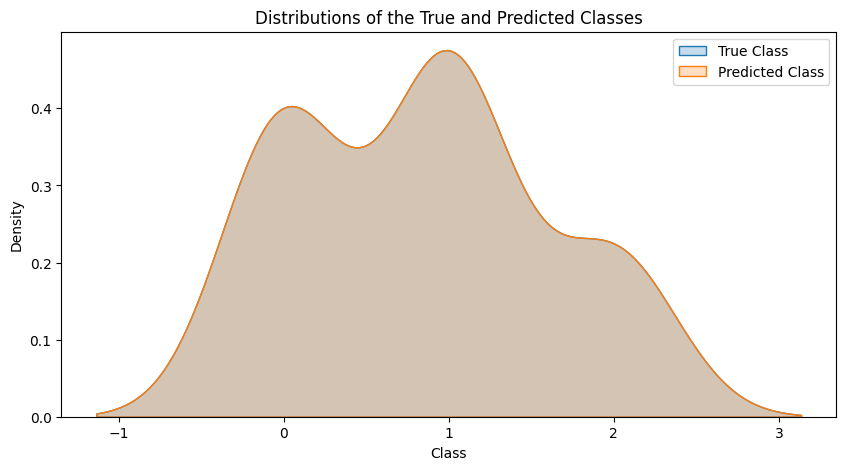

In [8]:
# Plot the distributions of the true and predicted classes
plt.figure(figsize=(10, 5))
sns.kdeplot(data=test_df, x='True Class', label='True Class', fill=True)
sns.kdeplot(data=test_df, x='Predicted Class', label='Predicted Class', fill=True)
plt.title('Distributions of the True and Predicted Classes')
plt.xlabel('Class')
plt.ylabel('Density')
plt.legend()
plt.show()

## Implement LDA for Multi Class Classification
Implementing LDA for multi class classification using `sklearn`'s `LinearDiscriminantAnalysis` class.

In [14]:
# Determine the number of features and classes
n_features = X_train.shape[1]
n_classes = len(np.unique(y_train))

# Compute the maximum number of components
max_components = min(n_features, n_classes - 1)

# Create an instance of LDA with the correct number of components
lda_multi = LDA(n_components=max_components)

# Fit the model on the training set
lda_multi.fit(X_train, y_train)

# Predict the classes on the testing set
y_pred_multi = lda_multi.predict(X_test)

# Print the confusion matrix
print(confusion_matrix(y_test, y_pred_multi))

# Print the classification report
print(classification_report(y_test, y_pred_multi))

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        11
         1.0       1.00      1.00      1.00        13
         2.0       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



## Visualize Multi Class Classification Results

Visualizing the results of the multi class classification using `matplotlib` and `seaborn`.

In [15]:
# Create a dataframe for the test set
test_df_multi = pd.DataFrame(X_test, columns=iris['feature_names'])

# Add the true and predicted classes to the dataframe
test_df_multi['True Class'] = y_test
test_df_multi['Predicted Class'] = y_pred_multi

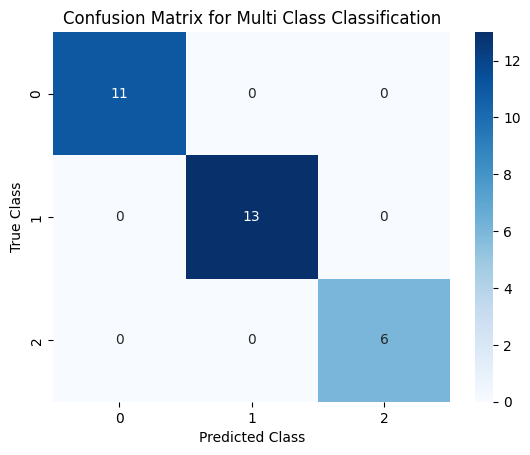

In [16]:
# Plot the confusion matrix
conf_mat_multi = confusion_matrix(y_test, y_pred_multi)
sns.heatmap(conf_mat_multi, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Multi Class Classification')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()

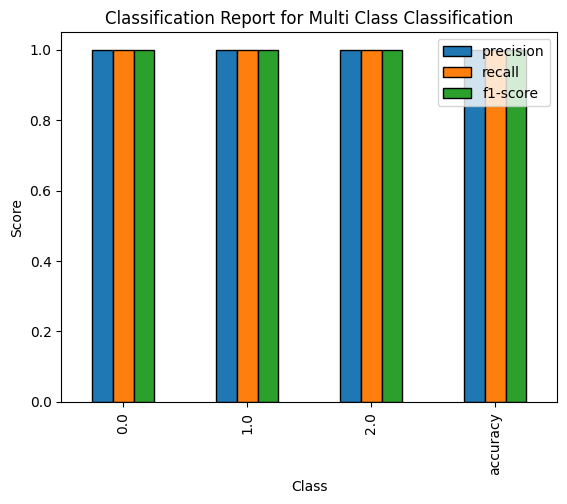

In [17]:
# Plot the classification report
report_multi = classification_report(y_test, y_pred_multi, output_dict=True)
report_df_multi = pd.DataFrame(report_multi).transpose()
report_df_multi.drop(['macro avg', 'weighted avg'], inplace=True)
report_df_multi[['precision', 'recall', 'f1-score']].plot(kind='bar', edgecolor='black')
plt.title('Classification Report for Multi Class Classification')
plt.xlabel('Class')
plt.ylabel('Score')
plt.show()

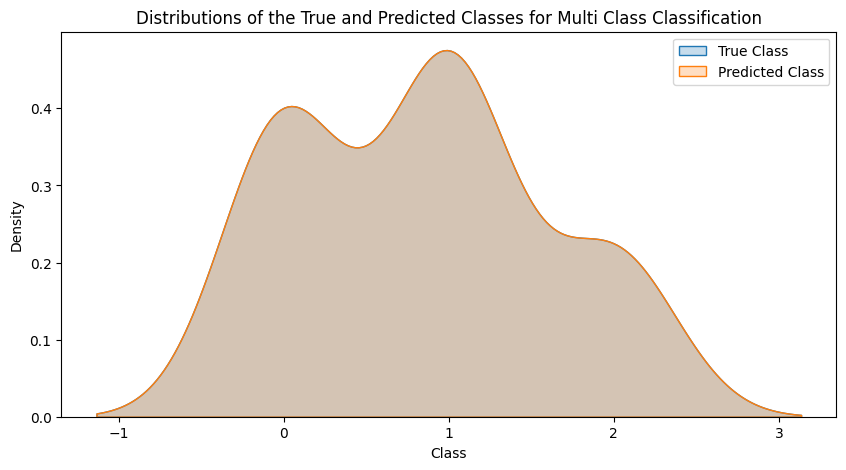

In [18]:
# Plot the distributions of the true and predicted classes
plt.figure(figsize=(10, 5))
sns.kdeplot(data=test_df_multi, x='True Class', label='True Class', fill=True)
sns.kdeplot(data=test_df_multi, x='Predicted Class', label='Predicted Class', fill=True)
plt.title('Distributions of the True and Predicted Classes for Multi Class Classification')
plt.xlabel('Class')
plt.ylabel('Density')
plt.legend()
plt.show()